In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import entropy
from time import time
from scipy.optimize import linear_sum_assignment as linear_assignment

In [3]:
# 定義計算SSE的函數
def calculate_sse(X, labels, centers):
    distances = np.linalg.norm(X - centers[labels], axis=1)
    return np.sum(distances**2)

In [4]:
# 定義計算層次聚類和DBSCAN SSE的函數
def calculate_non_centroid_sse(X, labels):
    unique_labels = set(labels)
    if -1 in unique_labels:  # 忽略DBSCAN的噪聲點
        unique_labels.remove(-1)
    sse = 0
    for k in unique_labels:
        cluster_k = X[labels == k]
        center_k = cluster_k.mean(axis=0)
        sse += np.sum((cluster_k - center_k) ** 2)
    return sse

In [5]:
# 定義計算熵的函數
def calculate_entropy(labels):
    value, counts = np.unique(labels, return_counts=True)
    return entropy(counts, base=np.e)

In [6]:
# 讀取數據
df = pd.read_csv('sizes3 (with class label).csv')

In [7]:
# 準備數據
X = df[['x', 'y']].values
y_true = df['class'].values

In [8]:
# 標準化特徵
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 參數設定為eps=0.3, min_samples=10

In [9]:
# 定義分群算法
cluster_algorithms = {'DBSCAN': DBSCAN(eps=0.3, min_samples=10) }
# 'eps' 和 'min_samples' 的值 嘗試不同的參數設定，並且比較分群結果

In [10]:
# 定義函數來找到最佳的標籤映射
def best_label_mapping(true_labels, pred_labels):
    D = max(true_labels.max(), pred_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(pred_labels.size):
        w[pred_labels[i], true_labels[i]] += 1
    ind = linear_assignment(-w)
    return ind

In [11]:
# 分群和性能評估
for name, algorithm in cluster_algorithms.items():
    start_time = time()
# 分群
cluster_labels = algorithm.fit_predict(X_scaled)
end_time = time()

In [12]:
# 計算SSE
sse = None
if hasattr(algorithm, 'inertia_'):
    sse = algorithm.inertia_
elif name in ['DBSCAN']:
    sse = calculate_non_centroid_sse(X_scaled, cluster_labels)/100

In [13]:
# 計算Accuracy
ind = best_label_mapping(y_true, cluster_labels)
new_labels = np.zeros_like(cluster_labels)
for i in range(len(ind[0])):
    new_labels[cluster_labels == ind[1][i]] = ind[0][i]
accuracy = accuracy_score(y_true, new_labels)

In [14]:
# 計算Entropy
ent = calculate_entropy(cluster_labels)

In [15]:
# 打印性能指標
print(f'{name} Clustering')
print(f'    Time taken: {end_time - start_time:.4f} seconds')
if sse is not None:
    print(f'    SSE: {sse:.4f}')
print(f'    Accuracy: {accuracy:.4f}')  # 输出准确性
print(f'    Entropy: {ent:.4f}')
print('--------------------------------------------------')

DBSCAN Clustering
    Time taken: 0.0100 seconds
    SSE: 3.4900
    Accuracy: 0.9480
    Entropy: 1.0840
--------------------------------------------------


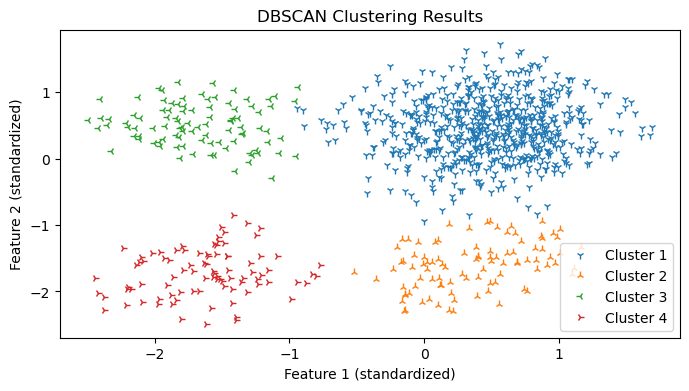

In [16]:
# 繪製分群結果
plt.figure(figsize=(8, 4))
markers = ['1', '2', '3', '4']  #定義標籤
for i, marker in zip(range(4), markers):
    plt.plot(X_scaled[cluster_labels == i, 0], X_scaled[cluster_labels == i, 1], 
             marker=marker, linestyle='', label=f'Cluster {i+1}')
plt.title(f'{name} Clustering Results')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.legend()
plt.show()

# 參數設定為eps=0.3, min_samples=15

In [17]:
# 定義分群算法
cluster_algorithms = {'DBSCAN': DBSCAN(eps=0.3, min_samples=15) }
# 'eps' 和 'min_samples' 的值 嘗試不同的參數設定，並且比較分群結果

In [18]:
# 定義函數來找到最佳的標籤映射
def best_label_mapping(true_labels, pred_labels):
    D = max(true_labels.max(), pred_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(pred_labels.size):
        w[pred_labels[i], true_labels[i]] += 1
    ind = linear_assignment(-w)
    return ind

In [19]:
# 分群和性能評估
for name, algorithm in cluster_algorithms.items():
    start_time = time()
# 分群
cluster_labels = algorithm.fit_predict(X_scaled)
end_time = time()

In [20]:
# 計算SSE
sse = None
if hasattr(algorithm, 'inertia_'):
    sse = algorithm.inertia_
elif name in ['DBSCAN']:
    sse = calculate_non_centroid_sse(X_scaled, cluster_labels)/100

In [21]:
# 計算Accuracy
ind = best_label_mapping(y_true, cluster_labels)
new_labels = np.zeros_like(cluster_labels)
for i in range(len(ind[0])):
    new_labels[cluster_labels == ind[1][i]] = ind[0][i]
accuracy = accuracy_score(y_true, new_labels)

In [22]:
# 計算Entropy
ent = calculate_entropy(cluster_labels)

In [23]:
# 打印性能指標
print(f'{name} Clustering')
print(f'    Time taken: {end_time - start_time:.4f} seconds')
if sse is not None:
    print(f'    SSE: {sse:.4f}')
print(f'    Accuracy: {accuracy:.4f}')  # 输出准确性
print(f'    Entropy: {ent:.4f}')
print('--------------------------------------------------')

DBSCAN Clustering
    Time taken: 0.0080 seconds
    SSE: 3.0541
    Accuracy: 0.9120
    Entropy: 1.1178
--------------------------------------------------


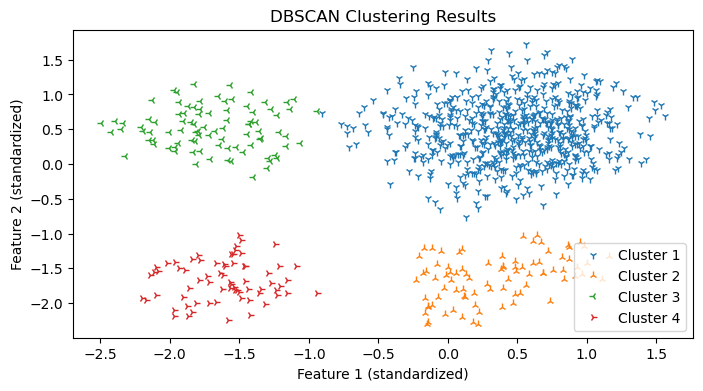

In [24]:
# 繪製分群結果
plt.figure(figsize=(8, 4))
markers = ['1', '2', '3', '4']  #定義標籤
for i, marker in zip(range(4), markers):
    plt.plot(X_scaled[cluster_labels == i, 0], X_scaled[cluster_labels == i, 1], 
             marker=marker, linestyle='', label=f'Cluster {i+1}')
plt.title(f'{name} Clustering Results')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.legend()
plt.show()

# 參數設定為eps=0.4, min_samples=10

In [25]:
# 定義分群算法
cluster_algorithms = {'DBSCAN': DBSCAN(eps=0.4, min_samples=10) }
# 'eps' 和 'min_samples' 的值 嘗試不同的參數設定，並且比較分群結果

In [26]:
# 定義函數來找到最佳的標籤映射
def best_label_mapping(true_labels, pred_labels):
    D = max(true_labels.max(), pred_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(pred_labels.size):
        w[pred_labels[i], true_labels[i]] += 1
    ind = linear_assignment(-w)
    return ind

In [27]:
# 分群和性能評估
for name, algorithm in cluster_algorithms.items():
    start_time = time()
# 分群
cluster_labels = algorithm.fit_predict(X_scaled)
end_time = time()

In [28]:
# 計算SSE
sse = None
if hasattr(algorithm, 'inertia_'):
    sse = algorithm.inertia_
elif name in ['DBSCAN']:
    sse = calculate_non_centroid_sse(X_scaled, cluster_labels)/100

In [29]:
# 計算Accuracy
ind = best_label_mapping(y_true, cluster_labels)
new_labels = np.zeros_like(cluster_labels)
for i in range(len(ind[0])):
    new_labels[cluster_labels == ind[1][i]] = ind[0][i]
accuracy = accuracy_score(y_true, new_labels)

In [30]:
# 計算Entropy
ent = calculate_entropy(cluster_labels)

In [31]:
# 打印性能指標
print(f'{name} Clustering')
print(f'    Time taken: {end_time - start_time:.4f} seconds')
if sse is not None:
    print(f'    SSE: {sse:.4f}')
print(f'    Accuracy: {accuracy:.4f}')  # 输出准确性
print(f'    Entropy: {ent:.4f}')
print('--------------------------------------------------')

DBSCAN Clustering
    Time taken: 0.0080 seconds
    SSE: 18.7041
    Accuracy: 0.6670
    Entropy: 0.0901
--------------------------------------------------


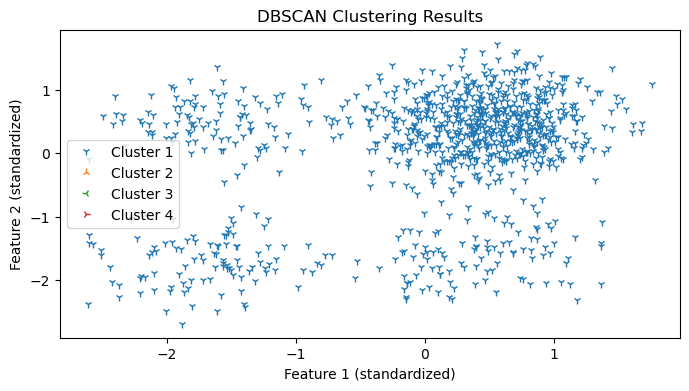

In [34]:
# 繪製分群結果
plt.figure(figsize=(8, 4))
markers = ['1', '2', '3', '4']  #定義標籤
for i, marker in zip(range(4), markers):
    plt.plot(X_scaled[cluster_labels == i, 0], X_scaled[cluster_labels == i, 1], 
             marker=marker, linestyle='', label=f'Cluster {i+1}')
plt.title(f'{name} Clustering Results')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.legend()
plt.show()